In [108]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

x,y = [],[]

for i in range(10):
    x.append(i)  
    y.append(((i + 1) * 10)/20)
    
x = np.array(x).reshape(-1, 1)
y = np.array(x).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)

x_train = torch.tensor(x, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [125]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [126]:
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [128]:
epochs = 500
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.10f}')

Epoch [50/500], Loss: 0.0037852705
Epoch [100/500], Loss: 0.0024377652
Epoch [150/500], Loss: 0.0020116230
Epoch [200/500], Loss: 0.0017137869
Epoch [250/500], Loss: 0.0011000179
Epoch [300/500], Loss: 0.0004379304
Epoch [350/500], Loss: 0.0001967537
Epoch [400/500], Loss: 0.0001708072
Epoch [450/500], Loss: 0.0001200089
Epoch [500/500], Loss: 0.0000535003


In [129]:
# Step 5: Evaluate the model
model.eval()
y_test_pred = model(x_test).detach().numpy()
test_loss = criterion(model(x_test), y_test).item()
print(f'Test Loss: {test_loss:.10f}')

Test Loss: 0.0000584154


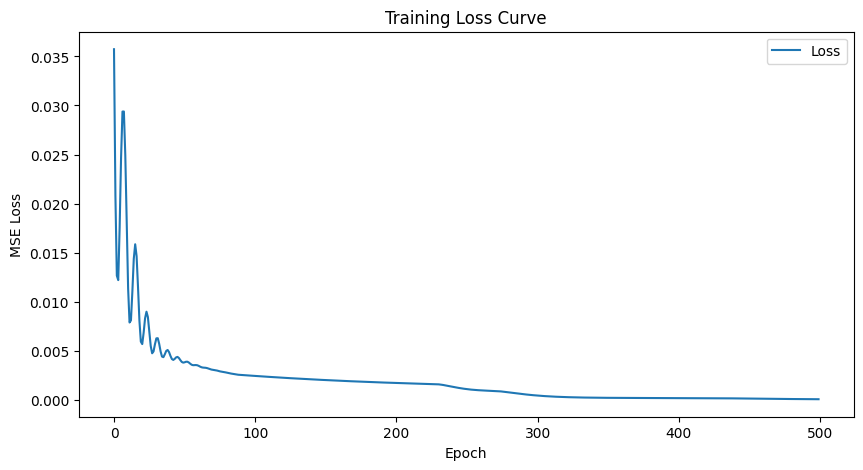

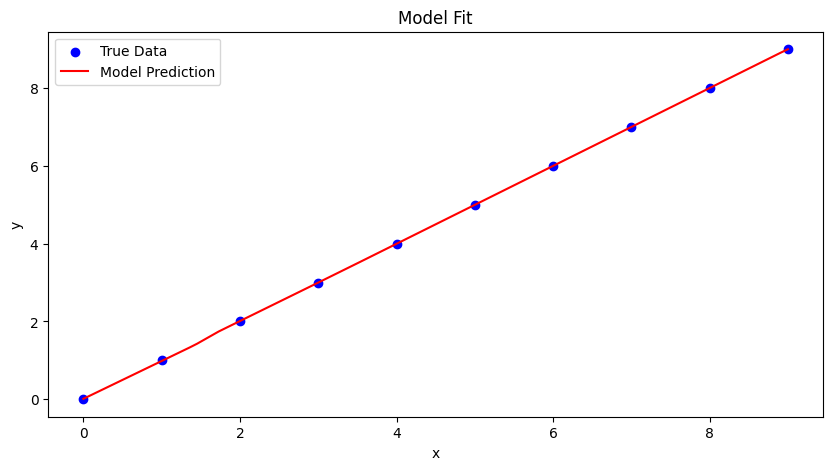

In [130]:

# Step 5: Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Plot predictions
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='True Data', color='blue')
x_test = torch.linspace(0, 9, 100).reshape(-1, 1)
y_pred = model(x_test).detach().numpy()
plt.plot(x_test.numpy(), y_pred, label='Model Prediction', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Fit')
plt.legend()
plt.show()